# RNN Labs

In this lab we will use RNN to accomplish two types of tasks:
- predicting a label to represent a set of words. This will be for us sentiment analysis but it could also have been topic modeling.
- predict a label for each word. It will be for us naming entity recognition (NER) but it could also have been part of speech tagging (POS).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-RNN-for-Sentiment-Analysis" data-toc-modified-id="Case-Study:-RNN-for-Sentiment-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: RNN for Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#Read-the-dataset" data-toc-modified-id="Read-the-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read the dataset</a></span></li><li><span><a href="#Text-normalisation" data-toc-modified-id="Text-normalisation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Text normalisation</a></span></li><li><span><a href="#Prepare-dataset-for-word-embedding-with-Keras" data-toc-modified-id="Prepare-dataset-for-word-embedding-with-Keras-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Prepare dataset for word embedding with Keras</a></span></li><li><span><a href="#Build-RNN-neural-network" data-toc-modified-id="Build-RNN-neural-network-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Build RNN neural network</a></span><ul class="toc-item"><li><span><a href="#Stage-1---use-last-hidden-state" data-toc-modified-id="Stage-1---use-last-hidden-state-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Stage 1 - use last hidden state</a></span></li><li><span><a href="#Stage-2---use-mean-of-all-hidden-state" data-toc-modified-id="Stage-2---use-mean-of-all-hidden-state-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Stage 2 - use mean of all hidden state</a></span></li><li><span><a href="#Stage-3---build-a-bi-directional-recurrent-network-and-use-all-hidden-state" data-toc-modified-id="Stage-3---build-a-bi-directional-recurrent-network-and-use-all-hidden-state-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Stage 3 - build a bi-directional recurrent network and use all hidden state</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Case-Study:-RNN-for-Naming-Entity-Recognition" data-toc-modified-id="Case-Study:-RNN-for-Naming-Entity-Recognition-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Case Study: RNN for Naming Entity Recognition</a></span><ul class="toc-item"><li><span><a href="#Read-the-dataset" data-toc-modified-id="Read-the-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read the dataset</a></span></li><li><span><a href="#Build-train-and-test-set" data-toc-modified-id="Build-train-and-test-set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Build train and test set</a></span></li><li><span><a href="#Encode-the-train-and-test-set" data-toc-modified-id="Encode-the-train-and-test-set-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Encode the train and test set</a></span></li><li><span><a href="#A-first-model-with-LSTM-cell" data-toc-modified-id="A-first-model-with-LSTM-cell-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>A first model with LSTM cell</a></span><ul class="toc-item"><li><span><a href="#Build-the-network" data-toc-modified-id="Build-the-network-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Build the network</a></span></li><li><span><a href="#Fit-the-network" data-toc-modified-id="Fit-the-network-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Fit the network</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Evaluate the model</a></span></li></ul></li><li><span><a href="#A-second-model-with-stacked-layers-of-Bi-LSTM-cell" data-toc-modified-id="A-second-model-with-stacked-layers-of-Bi-LSTM-cell-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>A second model with stacked layers of Bi-LSTM cell</a></span><ul class="toc-item"><li><span><a href="#Build-the-network" data-toc-modified-id="Build-the-network-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Build the network</a></span></li><li><span><a href="#Fit-the-network" data-toc-modified-id="Fit-the-network-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Fit the network</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Evaluate the model</a></span></li></ul></li><li><span><a href="#Conclusion-about-RNN-approach-for-NER" data-toc-modified-id="Conclusion-about-RNN-approach-for-NER-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Conclusion about RNN approach for NER</a></span></li></ul></li><li><span><a href="#Come-back-to-your-favourite-sentence..." data-toc-modified-id="Come-back-to-your-favourite-sentence...-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Come back to your favourite sentence...</a></span></li></ul></div>

## Case Study: RNN for Sentiment Analysis

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)


The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.
The work to be done is as follows:

1. Feature extraction and baseline (BOW + logistic regression)
    * read the dataset and understand it
    * put it in a format so that you can use `CountVectorizer` or`Tf-IDF` to extract the desired features
    * perform on the desired dates and preprocessing
    * use one of the classifiers you know to predict the polarity of different sentences
    
    
1. Word embedding
    * stage 1 build a network that uses Keras' embedding which is not language sensitive.
    * stage 1 try to use an existing embedding (https://github.com/facebookresearch/MUSE)
    
 
1. <span style="color:red">Recurrent neural network
    * <span style="color:red">stage 1: build a network that uses recurrent neurons. The classification will be done on the last hidden state 
    * <span style="color:red">stage 2: build a network that uses recurrent neurons. The classification will be done on the mean of all hidden state
    * <span style="color:red">stage 3: build a bi-directional network that uses recurrent neurons. The classification will be done on the mean of all hidden state
    </span>



**WARNING:** the dataset is voluminous, I can only encourage you to work first on a small part of it and only at the end, when the code is well debugged and that it is necessary to build the "final model", to use the whole dataset.
    
As for the previous labs, I propose you a first version so that you don't lose too much time to start. Take the time to understand the lines of code and ask questions if necessary. Beware, as usual the hyper-parameters are a bit crazy.

### Read the dataset

Could you find below a proposal. You can complete them.

In [1]:
import pandas as pd
import numpy as np

In [2]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0


In [3]:
X_train = TRAIN['Reviews']
y_train = TRAIN['Rating']-min(TRAIN['Rating'])

X_test = TEST['Reviews']
y_test = TEST['Rating']-min(TEST['Rating'])

In [4]:
nb_classes = len(np.unique(y_train))
X_train.shape, y_train.shape, np.unique(y_train)

((5000,), (5000,), array([0, 1, 2, 3, 4]))

In [5]:
nb_classes = len(np.unique(y_test))
X_test.shape, y_test.shape, np.unique(y_test)

((1000,), (1000,), array([0, 1, 2, 3, 4]))

### Text normalisation

It's your job

* you can put all the text in lower case
* you can remove all english stop word
* you can remove all/some punctuation sign
* you can remove all number
* you can stem/lemmatize the english word
* ...

You can of course re-use the previously used preprocessing but also do nothing to spend essentially time on the first two approaches to using text with neural networks.

In [6]:
import nltk # nltk.download()
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

In [7]:
def stem_sentences(sentence):
    """
    Performs stemming on a sentence
    """
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stemmed_sentence = []
    for word in token_words: stemmed_sentence.append(porter.stem(word))
    return " ".join(stemmed_sentence)

def lem_sentences(sentence):
    """
    Performs lemmatization on a sentence
    """
    lemmatizer = WordNetLemmatizer()
    token_words = word_tokenize(sentence)
    stemmed_sentence = []
    for word in token_words: stemmed_sentence.append(lemmatizer.lemmatize(word))
    return " ".join(stemmed_sentence)

def normalize_set(dataset, normalization="stem"):
    """
    Normalizes a dataset
    """
    for idx, entry in enumerate(dataset):
        if normalization == "stem": dataset[idx] = stem_sentences(entry)
        else: dataset[idx] = lem_sentences(entry)
    return dataset

In [8]:
X_train_norm = X_train.copy()
X_train_norm = normalize_set(X_train_norm)

X_test_norm = X_test.copy()
X_test_norm = normalize_set(X_test_norm)

### Prepare dataset for word embedding with Keras 

Could you find below a proposal. You can complete them.

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding

In [10]:
FILTERS='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
VOCABULARY_SIZE = 20 # Max the vocabulary size
SEQUENCE_SIZE = 10     # Nombre de mots dans une review
PADDING_MODE = 'pre'
PADDING_VALUE = 0
TRUNCATING_MODE='post'

In [11]:
# ENCODING

# create the tokenizer
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE,
              filters=FILTERS,
              lower=True,
              split=' ',
              oov_token="_UNK_")

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train_norm)
print('Found %s unique tokens.' % len(tokenizer.word_index))

# encode documents
X_train_enc = tokenizer.texts_to_sequences(X_train_norm)
X_test_enc = tokenizer.texts_to_sequences(X_test_norm)

Found 7170 unique tokens.


In [12]:
# PADDING

X_train_enc = pad_sequences(X_train_enc,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)
X_test_enc = pad_sequences(X_test_enc,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)

### Build RNN neural network

#### Stage 1 - use last hidden state
<span style="color:red">stage 1: build a network that uses recurrent neurons. The classification will be done on the last hidden state.</span>

![image](https://www.researchgate.net/profile/Huy_Tien_Nguyen/publication/321259272/figure/fig2/AS:572716866433034@1513557749934/Illustration-of-our-LSTM-model-for-sentiment-classification-Each-word-is-transfered-to-a.png)

Could you find below a proposal. You can complete them.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, LSTM, AveragePooling1D, GlobalAveragePooling1D
from tensorflow.keras import utils

In [14]:
EMBEDDING_SIZE = 8
return_sequences = False

In [15]:
# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)

# an RNN layer
output_1 = LSTM(64, return_sequences=return_sequences, activation='relu')(embedding)

# some Dense layers
output_2 = Dense(8, activation='relu')(output_1)

#output layer
predictions = Dense(nb_classes, activation='softmax')(output_2)

# build model
model = Model(inputs=inputs, outputs=predictions)

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 10, 8)             160       
_________________________________________________________________
lstm (LSTM)                  (None, 64)                18688     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
Total params: 19,413
Trainable params: 19,413
Non-trainable params: 0
_________________________________________________________________


In [16]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', 
                                      mode='max', 
                                      patience=5, 
                                      restore_best_weights=True, 
                                      verbose=1)

mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', 
                                        monitor='val_acc', 
                                        mode='max', 
                                        save_best_only=False, 
                                        verbose=1)

# fit model
history1 = model.fit(X_train_enc, y_train, validation_split=0.1, epochs=4000, callbacks=[es, mc], verbose=1)

Epoch 1/4000
141/141 [==============================] - 2s 8ms/step - loss: 1.5019 - acc: 0.4946 - val_loss: 1.2770 - val_acc: 0.5660

Epoch 00001: saving model to best_model.h5
Epoch 2/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.2935 - acc: 0.5249 - val_loss: 1.2003 - val_acc: 0.5680

Epoch 00002: saving model to best_model.h5
Epoch 3/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.2370 - acc: 0.5460 - val_loss: 1.1881 - val_acc: 0.5680

Epoch 00003: saving model to best_model.h5
Epoch 4/4000
141/141 [==============================] - 1s 5ms/step - loss: 1.2003 - acc: 0.5564 - val_loss: 1.1993 - val_acc: 0.5680

Epoch 00004: saving model to best_model.h5
Epoch 5/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.1922 - acc: 0.5639 - val_loss: 1.1966 - val_acc: 0.5680

Epoch 00005: saving model to best_model.h5
Epoch 6/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.1732 - acc: 0.5674 - val_loss: 1

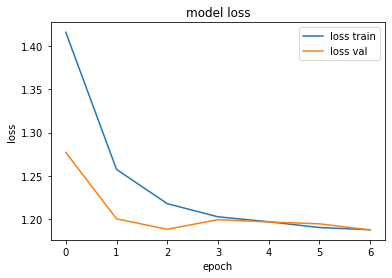

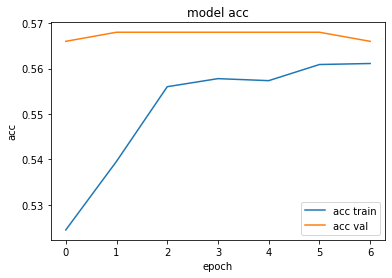

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc train', 'acc val'], loc='best')
plt.show()

In [18]:
''' Evaluate your result '''
''' Le jeu de donnée n'est pas très équilibré '''
from sklearn.metrics import f1_score, accuracy_score

y_pred = model.predict(X_test_enc)
y_pred = np.argmax(y_pred, axis=1)

# print(y_pred.shape, y_test.shape, X_test_enc.shape)

model1_accuracy = accuracy_score(y_pred, y_test)
model1_f1_score = f1_score(y_pred, y_test, average="weighted")

"acc=", model1_accuracy, "f1", model1_f1_score

('acc=', 0.579, 'f1', 0.7027424567132701)

#### Stage 2 - use mean of all hidden state

* <span style="color:red">stage 2: build a network that uses recurrent neurons. The classification will be done on the mean of all hidden state

    ![image](https://d3i71xaburhd42.cloudfront.net/db689ec8145af54dc23ecc232735b28adc38d45a/3-Figure3-1.png)
    
**Attention** in the diagram above a bi-LSTM is used. This will be the case in our third version. Use only the Forward layer.

In [19]:
# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)
# an RNN layer
output_1 = LSTM(32, return_sequences=True, activation='relu')(embedding)
#output layer
average_1 = AveragePooling1D()(output_1)
output_2 = Flatten()(average_1)
#output layer
predictions = Dense(nb_classes, activation='softmax')(output_2)
# build model
model = Model(inputs=inputs, outputs=predictions)
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 10, 8)             160       
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 32)            5248      
_________________________________________________________________
average_pooling1d (AveragePo (None, 5, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 805       
Total params: 6,213
Trainable params: 6,213
Non-trainable params: 0
_________________________________________________________

In [20]:
''' Fit your network - don't forget the use of EarlyStopping and other callbacks.'''

es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', 
                                      mode='max', 
                                      patience=5, 
                                      restore_best_weights=True, 
                                      verbose=1)

mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', 
                                        monitor='val_acc', 
                                        mode='max', 
                                        save_best_only=False, 
                                        verbose=1)

# fit model
history2 = model.fit(X_train_enc, 
                     y_train, 
                     validation_split=0.1, 
                     epochs=4000, 
                     callbacks=[es, mc], 
                     verbose=1)

Epoch 1/4000
141/141 [==============================] - 2s 5ms/step - loss: 1.4570 - acc: 0.5104 - val_loss: 1.2184 - val_acc: 0.5660

Epoch 00001: saving model to best_model.h5
Epoch 2/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.2263 - acc: 0.5398 - val_loss: 1.2134 - val_acc: 0.5660

Epoch 00002: saving model to best_model.h5
Epoch 3/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.2304 - acc: 0.5373 - val_loss: 1.1978 - val_acc: 0.5760

Epoch 00003: saving model to best_model.h5
Epoch 4/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.2193 - acc: 0.5462 - val_loss: 1.1988 - val_acc: 0.5720

Epoch 00004: saving model to best_model.h5
Epoch 5/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.1958 - acc: 0.5610 - val_loss: 1.1928 - val_acc: 0.5700

Epoch 00005: saving model to best_model.h5
Epoch 6/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.1851 - acc: 0.5648 - val_loss: 1

In [21]:
from sklearn.metrics import f1_score, accuracy_score

y_pred = model.predict(X_test_enc)
y_pred = np.argmax(y_pred, axis=1)

model2_accuracy = accuracy_score(y_pred, y_test)
model2_f1_score = f1_score(y_pred, y_test, average="weighted")

# print(y_pred.shape, y_test.shape, X_test_enc.shape)

"acc=", model2_accuracy, "f1", model2_f1_score

('acc=', 0.578, 'f1', 0.6984007286563512)

#### Stage 3 - build a bi-directional recurrent network and use all hidden state

* <span style="color:red">stage 3: build a bi-directional recurrent network and all hidden state as an input of a classifier.
    
![image](https://mlwhiz.com/images/birnn.png)

In [22]:
''' Put your work here '''
from tensorflow.keras.layers import Bidirectional

# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)
#LSTM layer
output_1 = Bidirectional(LSTM(128, return_sequences=True, activation='relu'))(embedding)
#Average layer
average_1 = AveragePooling1D()(output_1)
output_4 = Flatten()(average_1)
#Dense layer
dense = Dense(256, activation='relu')(output_4)
#Output layer
predictions = Dense(nb_classes, activation='softmax')(dense)

# build model
model = Model(inputs=inputs, outputs=predictions)
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 10, 8)             160       
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 256)           140288    
_________________________________________________________________
average_pooling1d_1 (Average (None, 5, 256)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               327936    
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1285

In [23]:
''' Fit your network - don't forget the use of EarlyStopping and other callbacks.'''

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_acc', 
    mode='max', 
    patience=5, 
    restore_best_weights=True, 
    verbose=1
)
mc = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', 
    monitor='val_acc', 
    mode='max', 
    save_best_only=False, 
    verbose=1
)

# fit model
history3 = model.fit(X_train_enc, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=4000, 
                    callbacks=[es, mc], 
                    verbose=1)

Epoch 1/4000
141/141 [==============================] - 3s 11ms/step - loss: 1.3324 - acc: 0.5207 - val_loss: 1.2206 - val_acc: 0.5660

Epoch 00001: saving model to best_model.h5
Epoch 2/4000
141/141 [==============================] - 1s 9ms/step - loss: 1.2086 - acc: 0.5439 - val_loss: 1.2045 - val_acc: 0.5620

Epoch 00002: saving model to best_model.h5
Epoch 3/4000
141/141 [==============================] - 1s 9ms/step - loss: 1.2019 - acc: 0.5581 - val_loss: 1.2010 - val_acc: 0.5740

Epoch 00003: saving model to best_model.h5
Epoch 4/4000
141/141 [==============================] - 1s 9ms/step - loss: 1.1854 - acc: 0.5577 - val_loss: 1.1894 - val_acc: 0.5720

Epoch 00004: saving model to best_model.h5
Epoch 5/4000
141/141 [==============================] - 1s 9ms/step - loss: 1.2035 - acc: 0.5558 - val_loss: 1.1952 - val_acc: 0.5680

Epoch 00005: saving model to best_model.h5
Epoch 6/4000
141/141 [==============================] - 1s 10ms/step - loss: 1.1604 - acc: 0.5690 - val_loss:

In [24]:
from sklearn.metrics import f1_score, accuracy_score

y_pred = model.predict(X_test_enc)
y_pred = np.argmax(y_pred, axis=1)

model3_accuracy = accuracy_score(y_pred, y_test)
model3_f1_score = f1_score(y_pred, y_test, average="weighted")

# print(y_pred.shape, y_test.shape, X_test_enc.shape)

"acc=", model3_accuracy, "f1", model3_f1_score

('acc=', 0.59, 'f1', 0.7041183694252253)

### Conclusion

Compare the three approaches with the previous results.

## Case Study: RNN for Naming Entity Recognition

Named entity recognition (NER) ‒ also called entity identification or entity extraction ‒ is an AI technique that automatically identifies named entities in a text and classifies them into predefined categories. Entities can be names of people, organizations, locations, times, quantities, monetary values, percentages, and more.

Extracting these entities helps businesses easily analyze huge amounts of unstructured data, like emails, open-ended survey responses, social media conversations, and more.

![image](https://monkeylearn.com/static/d0575562cdedb47340c00662c5c1b859/80132/Example.png)

### Read the dataset

In [25]:
train_data = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/NER/ner_train_dataset.csv.gz", 
                         encoding="latin1")
test_data = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/NER/ner_test_dataset.csv.gz", 
                        encoding="latin1")
train_data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [26]:
train_data = train_data.fillna(method="ffill")
test_data = test_data.fillna(method="ffill")
train_data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


For NER or POS tasks, pre-processing is generally not done except to standardize the text a little:
- correction of typing errors
- homogenization of dates and telephone numbers
- lower case setting of the text

but very generally, we do not do stemming or lemmatization.

### Build train and test set

In [27]:
class RetrieveSentance(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        function = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(function)
        self.sentences = [s for s in self.grouped]
    
    def retrieve(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [28]:
train = RetrieveSentance(train_data)
test = RetrieveSentance(test_data)

In [29]:
# Build train set (X)
X_train = [[s[0].lower() for s in sent] for sent in train.sentences]
X_test = [[s[0].lower() for s in sent] for sent in test.sentences]

In [30]:
# Build train set (y)
y_train = [[s[2] for s in sent] for sent in train.sentences]
y_test = [[s[2] for s in sent] for sent in test.sentences]

In [31]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

14999 14999 15000 15000


In [32]:
assert len(X_train)==len(y_train)
assert len(X_test)==len(y_test)

In [33]:
# Defines the vocabulary
import itertools

WORDS = set(itertools.chain(*X_train))
TAGS = sorted(set(itertools.chain(*y_train)))
vocab_size = len(WORDS)+2 # "UNK" and "PAD"
nb_classes = len(TAGS)+1  # "PAD"

In [34]:
print("="*40)
print("vocabulary size:", vocab_size)
print("class number:", nb_classes)
print("number sentences in train", len(X_train))

vocabulary size: 18342
class number: 18
number sentences in train 14999


### Encode the train and test set

In [35]:
# word is key and its value is corresponding index
word2idx = {w : i + 2 for i, w in enumerate(WORDS)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0

# Dictionary label:index pair
# label is key and value is index.
tag2idx = {t : i + 1 for i, t in enumerate(TAGS)}
tag2idx["PAD"] = 0

# Build reverse dictionnary
idx2word = {i: w for w, i in word2idx.items()}
idx2tag = {i: w for w, i in tag2idx.items()}

In [36]:
#Folds each sentence that is longer than LINE_SIZE
def folds_sentences(X, y, size=60):
    X2 = []
    y2 = []
    for x_sent, t_sent in zip(X, y):
        X_ = []
        y_ = []
        for x, y in zip(x_sent, t_sent):
            if len(X_)==size:
                # We've reached the maximum size for one line, so we're starting a new line.
                X2 += [X_]
                y2 += [y_]
                X_ = [x]
                y_ = [y]
            else:
                X_ += [x]
                y_ += [y]
        X2 += [X_]
        y2 += [y_]
    return X2, y2

In [37]:
# Converts each sentence into list of index
def encode_sentences(S, dictionnary):
    return [[dictionnary[w] if w in dictionnary.keys() else dictionnary["UNK"] for w in s] for s in S]

In [38]:
# Adds padding
def add_padding(S, size, pad_id=0):
    return tf.keras.preprocessing.sequence.pad_sequences(maxlen=size, sequences=S, padding="post", value=pad_id)

In [39]:
# Do all at the same time
import tensorflow as tf

LINE_SIZE = 10

def embed_sentences(X, y, word2idx, tag2idx, size=60):
    X, y = folds_sentences(X, y, LINE_SIZE)
    X_enc = encode_sentences(X, word2idx)
    y_enc = encode_sentences(y, tag2idx)
    X_enc = add_padding(X_enc, size, word2idx["PAD"])
    y_enc = add_padding(y_enc, size, tag2idx["PAD"])    
    return X_enc, y_enc

X_train_enc, y_train_enc = embed_sentences(X_train, y_train, word2idx, tag2idx, LINE_SIZE)

In [40]:
X_train_enc.shape, y_train_enc.shape

((39471, 10), (39471, 10))

In [41]:
# Let's check the first sentence before and after processing.
print('*****Before Processing first sentence: *****\n', ' '.join([w for w in X_train[0]]))
print('*****After Processing first sentence: *****\n ', X_train_enc[0])

*****Before Processing first sentence: *****
 thousands of demonstrators have marched through london to protest the war in iraq and demand the withdrawal of british troops from that country .
*****After Processing first sentence: *****
  [  944   125  2327   682  8172   335  8985  3545 17983 16177]


In [42]:
# First sentence label before and after processing.
print('*****Before Processing first sentence: *****\n', ' '.join([w for w in y_train[0]]))
print('*****After Processing first sentence: *****\n ', y_train_enc[0])

*****Before Processing first sentence: *****
 O O O O O O B-geo O O O O O B-geo O O O O O B-gpe O O O O O
*****After Processing first sentence: *****
  [17 17 17 17 17 17  3 17 17 17]


In [43]:
''' You can do the same for test set '''
X_test_enc, y_test_enc = embed_sentences(X_test, y_test, word2idx, tag2idx, LINE_SIZE)

### A first model with LSTM cell

![image](https://confusedcoders.com/wp-content/uploads/2019/12/many_to_many.png)

#### Build the network

In [44]:
def build_network(input_size, nb_classes,
                  EMBEDDING_SIZE=50, RNN_SIZE=25, DENSE_SIZE=50, DROPOUT = 0.2):

    inputs = tf.keras.layers.Input(shape=(input_size,))
    embed = tf.keras.layers.Embedding(input_dim=vocab_size, 
                                      output_dim=EMBEDDING_SIZE, 
                                      input_length=input_size, 
                                      mask_zero=True)(inputs)
    lstm = tf.keras.layers.LSTM(units=RNN_SIZE, 
                                return_sequences=True, 
                                recurrent_dropout=DROPOUT)(embed)
    dense = tf.keras.layers.Dense(DENSE_SIZE, activation='relu')(lstm)
    dense = tf.keras.layers.Dense(DENSE_SIZE//4, activation='relu')(dense)
    output = tf.keras.layers.Dense(nb_classes, activation='softmax')(dense)
    return tf.keras.models.Model(inputs, output)

In [45]:
model = build_network(LINE_SIZE, nb_classes)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 10, 50)            917100    
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 25)            7600      
_________________________________________________________________
dense_5 (Dense)              (None, 10, 50)            1300      
_________________________________________________________________
dense_6 (Dense)              (None, 10, 12)            612       
_________________________________________________________________
dense_7 (Dense)              (None, 10, 18)            234       
Total params: 926,846
Trainable params: 926,846
Non-trainable params: 0
_____________________________________________________

#### Fit the network

In [46]:
def fit_network(model, X, y, BATCH_SIZE, loss, metrics):
    epochs=10

    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, verbose=1, patience=5)
    mc = tf.keras.callbacks.ModelCheckpoint('best_model_lstm.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

    model.compile(optimizer='adam', loss=loss, metrics=metrics)
    return model.fit(X, y,
                      batch_size= BATCH_SIZE,
                      epochs=epochs,
                      validation_split=0.1,
                      callbacks=[mc, es])

In [47]:
BATCH_SIZE = 16

history4 = fit_network(model,
                      X_train_enc, y_train_enc,
                      BATCH_SIZE,
                      tf.keras.backend.sparse_categorical_crossentropy,
                      ['accuracy'])

Epoch 1/10
2221/2221 [==============================] - 33s 14ms/step - loss: 0.6796 - accuracy: 0.8566 - val_loss: 0.2363 - val_accuracy: 0.9222

Epoch 00001: val_accuracy improved from -inf to 0.92216, saving model to best_model_lstm.h5
Epoch 2/10
2221/2221 [==============================] - 29s 13ms/step - loss: 0.2010 - accuracy: 0.9322 - val_loss: 0.1869 - val_accuracy: 0.9388

Epoch 00002: val_accuracy improved from 0.92216 to 0.93884, saving model to best_model_lstm.h5
Epoch 3/10
2221/2221 [==============================] - 30s 13ms/step - loss: 0.1417 - accuracy: 0.9510 - val_loss: 0.1716 - val_accuracy: 0.9411

Epoch 00003: val_accuracy improved from 0.93884 to 0.94108, saving model to best_model_lstm.h5
Epoch 4/10
2221/2221 [==============================] - 30s 14ms/step - loss: 0.1164 - accuracy: 0.9574 - val_loss: 0.1713 - val_accuracy: 0.9418

Epoch 00004: val_accuracy improved from 0.94108 to 0.94184, saving model to best_model_lstm.h5
Epoch 5/10
2221/2221 [=============

In [48]:
def plot_learning_curve(history, loss='loss', acc='acc'):
    fig = plt.figure(figsize = (16, 4))

    plt.subplot(121)
    plt.plot(history4.history[loss], label='Training loss')
    plt.plot(history4.history['val_'+loss], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(history4.history[acc], label='Training acc')
    plt.plot(history4.history['val_'+acc], label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.show()

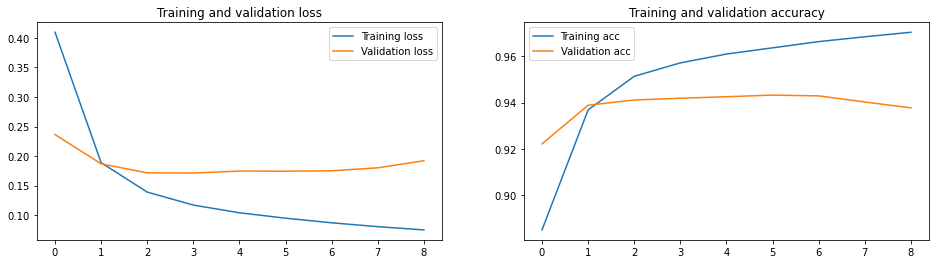

In [49]:
plot_learning_curve(history4, 'loss', 'accuracy')

#### Evaluate the model

In [50]:
from seqeval.metrics import f1_score
from seqeval.metrics import classification_report

def evaluate(model, X_enc, y_enc, size):
    def decode(y, dictionnary=idx2tag):
        if len(y.shape)==3:
            y = np.argmax(y, axis=-1)
        return [[dictionnary[i] if dictionnary[i]!="PAD" else "O" for i in row] for row in y]

    y_pred_enc = model.predict(X_enc)
    F1_score = f1_score(y_pred=decode(y_pred_enc), y_true=decode(y_enc))
    print("F1-score is : {:.1%}".format(F1_score))
    
    report = classification_report(y_pred=decode(y_pred_enc), y_true=decode(y_enc))
    print(report)

In [51]:
evaluate(model, X_test_enc, y_test_enc, LINE_SIZE)

F1-score is : 67.9%


/home/qlr/anaconda3/lib/python3.8/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         art       0.00      0.00      0.00       117
         eve       0.00      0.00      0.00        95
         geo       0.75      0.79      0.77     12166
         gpe       0.91      0.93      0.92      4738
         nat       0.00      0.00      0.00        49
         org       0.38      0.36      0.37      6610
         per       0.61      0.52      0.56      5645
         tim       0.79      0.73      0.76      6632

   micro avg       0.69      0.67      0.68     36052
   macro avg       0.43      0.42      0.42     36052
weighted avg       0.68      0.67      0.67     36052



### A second model with stacked layers of Bi-LSTM cell

Do the same with BI-LSTM cell. Eventually, use more than one Bi-LSTM layers

![image](https://www.researchgate.net/profile/Robert_Gao/publication/325564535/figure/fig2/AS:690279778615307@1541586932678/Diagram-of-a-two-layer-bi-directional-LSTM-network.png)

#### Build the network

In [52]:
def build_network(input_size, nb_classes,
                  EMBEDDING_SIZE=50, 
                  RNN_SIZE=25, 
                  DENSE_SIZE=50, 
                  DROPOUT = 0.2):
    inputs = tf.keras.layers.Input(shape=(input_size,))
    embed = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_SIZE, input_length=input_size, mask_zero=True)(inputs)
    lstm1 = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(units=RNN_SIZE, return_sequences=True, recurrent_dropout=DROPOUT),
        merge_mode="concat"
    )(embed)
    lstm2 = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(units=RNN_SIZE, return_sequences=True, recurrent_dropout=DROPOUT),
        merge_mode="concat"
    )(lstm1)
    dense = tf.keras.layers.Dense(DENSE_SIZE, activation='relu')(lstm2)
    dense = tf.keras.layers.Dense(DENSE_SIZE//4, activation='relu')(dense)
    output = tf.keras.layers.Dense(nb_classes, activation='softmax')(dense)
    return tf.keras.models.Model(inputs, output)

model = build_network(LINE_SIZE, nb_classes)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 10, 50)            917100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 50)            15200     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 50)            15200     
_________________________________________________________________
dense_8 (Dense)              (None, 10, 50)            2550      
_________________________________________________________________
dense_9 (Dense)              (None, 10, 12)            612       
_________________________________________________________________
dense_10 (Dense)             (None, 10, 18)            234 

#### Fit the network

In [53]:
BATCH_SIZE = 16

history5 = fit_network(model,
                      X_train_enc, y_train_enc,
                      BATCH_SIZE,
                      tf.keras.backend.sparse_categorical_crossentropy,
                      ['accuracy'])

Epoch 1/10
2221/2221 [==============================] - 51s 20ms/step - loss: 0.6109 - accuracy: 0.8623 - val_loss: 0.2244 - val_accuracy: 0.9263

Epoch 00001: val_accuracy improved from -inf to 0.92629, saving model to best_model_lstm.h5
Epoch 2/10
2221/2221 [==============================] - 43s 19ms/step - loss: 0.1804 - accuracy: 0.9395 - val_loss: 0.1798 - val_accuracy: 0.9380

Epoch 00002: val_accuracy improved from 0.92629 to 0.93805, saving model to best_model_lstm.h5
Epoch 3/10
2221/2221 [==============================] - 43s 20ms/step - loss: 0.1181 - accuracy: 0.9599 - val_loss: 0.1618 - val_accuracy: 0.9445

Epoch 00003: val_accuracy improved from 0.93805 to 0.94453, saving model to best_model_lstm.h5
Epoch 4/10
2221/2221 [==============================] - 43s 20ms/step - loss: 0.0934 - accuracy: 0.9672 - val_loss: 0.1566 - val_accuracy: 0.9499

Epoch 00004: val_accuracy improved from 0.94453 to 0.94989, saving model to best_model_lstm.h5
Epoch 5/10
2221/2221 [=============

#### Evaluate the model

In [54]:
evaluate(model, X_test_enc, y_test_enc, LINE_SIZE)

F1-score is : 73.2%
              precision    recall  f1-score   support

         art       0.00      0.00      0.00       117
         eve       0.00      0.00      0.00        95
         geo       0.82      0.79      0.80     12166
         gpe       0.95      0.92      0.93      4738
         nat       0.00      0.00      0.00        49
         org       0.47      0.46      0.47      6610
         per       0.65      0.64      0.64      5645
         tim       0.86      0.79      0.82      6632

   micro avg       0.75      0.72      0.73     36052
   macro avg       0.47      0.45      0.46     36052
weighted avg       0.75      0.72      0.73     36052



### Conclusion about RNN approach for NER

In [55]:
def plot_compare(history1, history2):
    fig = plt.figure(figsize = (16, 4))

    plt.subplot(121)
    plt.plot(history1.history['val_loss'], label='Validation Loss for unidirectional RNN on NER')
    plt.plot(history2.history['val_loss'], label='Validation Loss for bidirectional 2-layer RNN on NER')
    plt.title('Validation losses of the two RNN implementations')
    plt.legend()

    plt.subplot(122)
    plt.plot(history1.history['val_accuracy'], label='Validation Accuracy for unidirectional RNN on NER')
    plt.plot(history2.history['val_accuracy'], label='Validation Accuracy for 2-layer bidirectional RNN on NER')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.show()

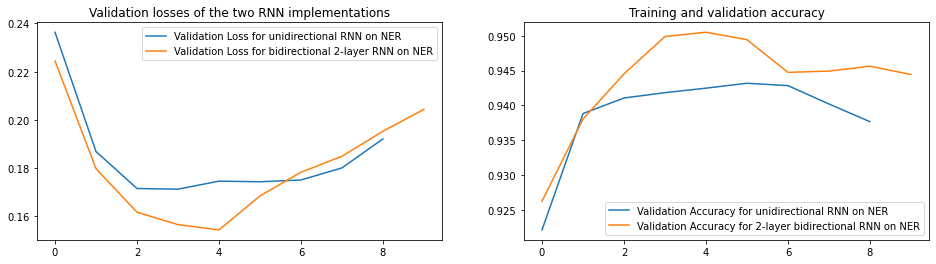

In [56]:
plot_compare(history4, history5)

## Come back to your favourite sentence...

Can you build the embedding of your 5 sentences with a pre-trained embedding using a RNN approach and see if the result is more relevant than before?

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity

import nltk
# nltk.download()

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize

In [58]:
# We reuse our sentence from lecture 1, lab2, ML Algos

tolkien_sentences = [
    "In a hole in the ground there lived a hobbit.",
    "A hobbit lived in a hole in the ground there.",
    "A hobbit lived in a hollow in the ground there.",
    "There lived a hobbit in a pit in the earth.",
    "A hobbit didn't live in a hole in the ground there.",
    "A hobbit does not live in a hollow in the ground there.",
    "There lived a hobbit in a pit in the earth.",
    "There lived a hobbit in a hole in the ground.",
    "a hobbit dwelled in a ground hole there."
]

# sentences for pretraining our RNN encoder (source: NER)
pretraining_sentences = [" ".join(seq) for seq in X_train]

In [59]:
# RNN hyperparameters declaration
num_words = 200
maxlen = 15
embed_dim = 16
batch_size = 16

In [60]:
# Tokenizing and Padding of the sentences selected for pre_training
tokenizer = Tokenizer(num_words = num_words, split=' ')
tokenizer.fit_on_texts(pretraining_sentences)
seqs = tokenizer.texts_to_sequences(pretraining_sentences)
pad_seqs = pad_sequences(seqs, maxlen)

In [61]:
# RNN Model: bidirectional LSTM

# Input layer
encoder_inputs = Input(shape=(maxlen,))
# embedding layer
emb_layer = Embedding(num_words, embed_dim,input_length = maxlen)
x = emb_layer(encoder_inputs)
state_h = Bidirectional(LSTM(128, activation='relu'))(x)
# encoder layer
encoder_model = Model(inputs=encoder_inputs, outputs=state_h)
# output layer
seq2seq_encoder_out = encoder_model(encoder_inputs)

In [62]:
# We encode our Tolkien sentences based on our pretrained LSTM model

seq = tokenizer.texts_to_sequences(tolkien_sentences)
pad_seq = pad_sequences(seq, maxlen)
sentence_vec = encoder_model.predict(pad_seq)

In [63]:
sentence_vec

array([[0.00080874, 0.00627127, 0.00350141, ..., 0.00039136, 0.00516449,
        0.00052146],
       [0.00114554, 0.00839773, 0.00313309, ..., 0.00037452, 0.00512875,
        0.00054176],
       [0.00114554, 0.00839773, 0.00313309, ..., 0.00037452, 0.00512875,
        0.00054176],
       ...,
       [0.00020988, 0.00675099, 0.00307141, ..., 0.00034296, 0.00531254,
        0.00038959],
       [0.00020988, 0.00675099, 0.00307141, ..., 0.00034296, 0.00531254,
        0.00038959],
       [0.00122307, 0.00585836, 0.00295777, ..., 0.000181  , 0.00501172,
        0.00019966]], dtype=float32)

<hr>

**We reuse the code from lab 1**

In [64]:
# Calculate similarities for a list of embeddings
def calculate_similarities(embeddings_list):
    similarities = np.zeros((len(embeddings_list[0]), len(embeddings_list)))
    for i, embeddings in enumerate(embeddings_list):
        similarities[:,i] = cosine_similarity([embeddings[0]], embeddings)
    return similarities

In [65]:
# For plotting similarities
# from: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [66]:
# remove stop word (https://en.wikipedia.org/wiki/Stop_word)
stop_word_list = [".", ",", "[", "]", "`", "(", ")", "?", "'", "'s", ":"]

def remove_stop_word(txt_token, stop_word_list):
    return [w for w in txt_token if w not in stop_word_list]

# stem your text
def stemming(txt_token):
    # Creater a stemmer
    porter = nltk.PorterStemmer()

    return [porter.stem(w) for w in txt_token]

# lemmatize your text
def lemmatization(txt_token):
    # Creater a lemmatizer
    #nltk.download('wordnet')
    WNlemma = nltk.WordNetLemmatizer()

    return [WNlemma.lemmatize(w) for w in txt_token]

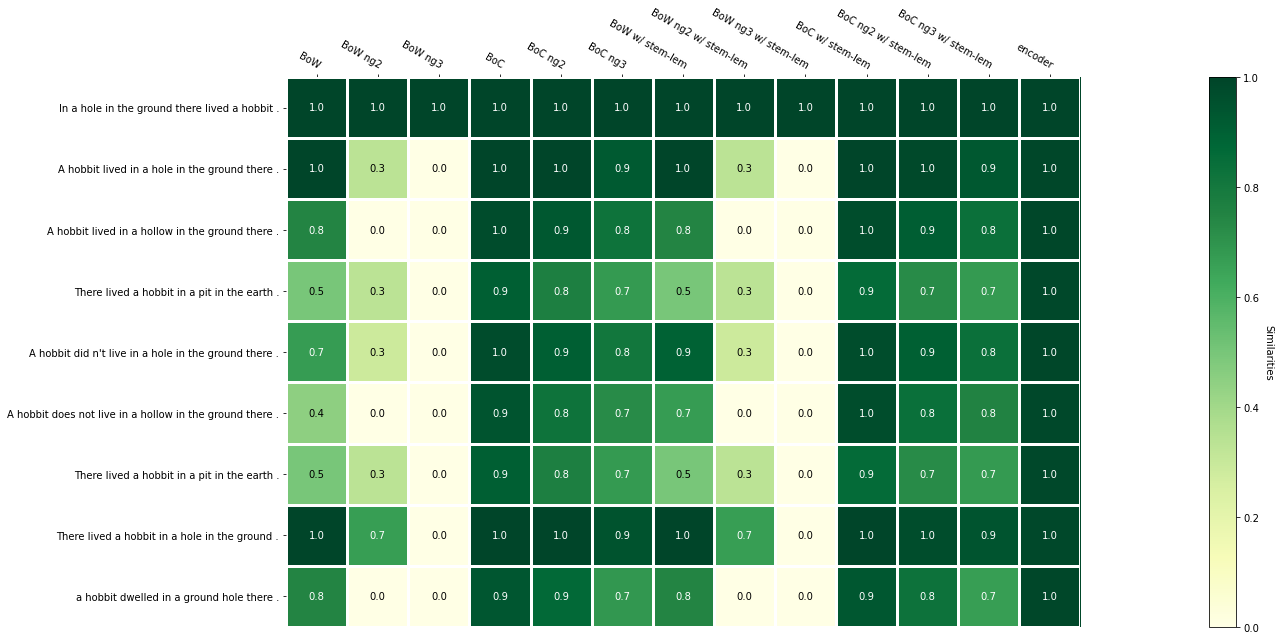

In [67]:
from sklearn.metrics import mean_absolute_error

names = ["BoW", "BoW ng2",  "BoW ng3",
         "BoC", "BoC ng2",  "BoC ng3",
         "BoW w/ stem-lem", "BoW ng2 w/ stem-lem", "BoW ng3 w/ stem-lem", 
         "BoC w/ stem-lem", "BoC ng2 w/ stem-lem", "BoC ng3 w/ stem-lem",
         "encoder"] # We add our encoder embedding

# Tokenizes the sentences
tokenized_sentences = [word_tokenize(sentence) for sentence in tolkien_sentences]
tokenized_sentences = list(map(" ".join, tokenized_sentences))
stemlemtokenized_sentences = [lemmatization(stemming(remove_stop_word(word_tokenize(sentence), 
                                                           stop_word_list)))
                       for sentence in tolkien_sentences]
stemlemtokenized_sentences = list(map(" ".join, stemlemtokenized_sentences))

# Vectorizes the tokens using CountVectorizer
vectors = []
for idx, analyzer in enumerate(["word", "char", "word", "char"]):
    for ngram in [(1,1), (2,2), (3,3)]:
        cv = CountVectorizer(binary=True, 
                             analyzer=analyzer, 
                             ngram_range=ngram, 
                             stop_words="english")
        if idx < 2: bag = cv.fit_transform(tokenized_sentences)
        else: bag = cv.fit_transform(stemlemtokenized_sentences)
        vectors.append(bag.toarray())

vectors.append(sentence_vec) # We add our encoder embedding
        
# Calculates the similarities between sentence vectors within the same bundle
similarities = calculate_similarities(vectors)

# Plots the embedding heatmap, showing similarities when the value tends toward 1
fig, ax = plt.subplots(figsize=(10+2*similarities.shape[1],similarities.shape[0]))
im, cbar = heatmap(similarities, tokenized_sentences, names, ax=ax,
                   cmap="YlGn", cbarlabel="Similarities")
texts = annotate_heatmap(im, valfmt="{x:.1f}")
fig.tight_layout()
plt.show()

**Conclusion**:

Using a RNN Encoder yield a better encoding, we see that the similarities are 1 or close to 1, performing better than the Bag of Character encoding (with and without stemming and lemming).